In [ ]:
!pip install numpy
!pip install tensorflow
!pip install pandas
!pip install scikit-learn
!pip install matplotlib
!pip install seaborn
!pip install openpyxl

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [139]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import timedelta
import os

In [140]:
df = pd.read_excel(os.path.join('/content', 'bakery_sales.xlsx'), engine='openpyxl')

In [141]:
df

,date,sales,customer,Quantity
0,2021-01-02,987.85,365,581
1,2021-01-03,1014.30,375,564
2,2021-01-04,461.90,210,315
3,2021-01-05,515.70,235,309
4,2021-01-06,0.00,0,0
...,...,...,...,...
358,2021-12-26,1115.00,429,735
359,2021-12-27,751.55,329,506
360,2021-12-28,792.40,370,524
361,2021-12-29,704.75,294,458


In [142]:
df.dropna(inplace=True)
df['date'] = pd.to_datetime(df['date'])
df['day_name'] = df['date'].dt.day_name()
df['day_of_month'] = df['date'].dt.day
df['week_of_month'] = df['date'].apply(lambda x: (x.day - 1) // 7 + 1)

LABEL = 'sales'
NUMERICAL_FEATURES = ['customer', 'Quantity']
CATEGORICAL_FEATURES = ['day_name', 'day_of_month', 'week_of_month']

df[LABEL] = df[LABEL].astype(float)
df[NUMERICAL_FEATURES] = df[NUMERICAL_FEATURES].astype(float)
df[CATEGORICAL_FEATURES] = df[CATEGORICAL_FEATURES].astype('category')

df.set_index('date', inplace=True)
df.sort_index(inplace=True)

df

,sales,customer,Quantity,day_name,day_of_month,week_of_month
date,,,,,,
2021-01-02,987.85,365.0,581.0,Saturday,2,1
2021-01-03,1014.30,375.0,564.0,Sunday,3,1
2021-01-04,461.90,210.0,315.0,Monday,4,1
2021-01-05,515.70,235.0,309.0,Tuesday,5,1
2021-01-06,0.00,0.0,0.0,Wednesday,6,1
...,...,...,...,...,...,...
2021-12-26,1115.00,429.0,735.0,Sunday,26,4
2021-12-27,751.55,329.0,506.0,Monday,27,4
2021-12-28,792.40,370.0,524.0,Tuesday,28,4


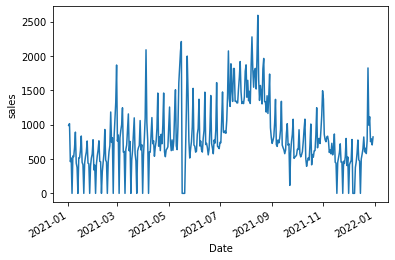

In [143]:
plt.plot(df[LABEL])
plt.ylabel(LABEL)
plt.xlabel('Date')
plt.gcf().autofmt_xdate()
plt.show()

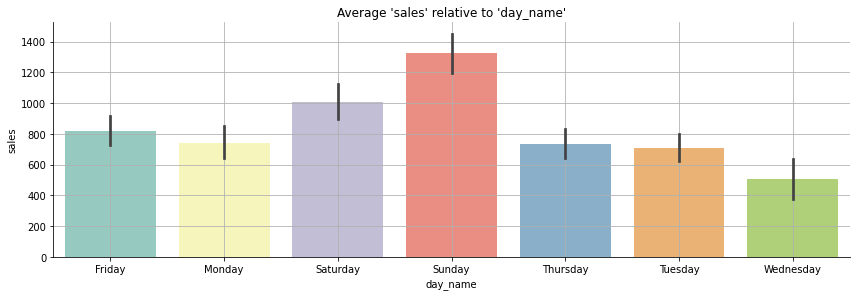

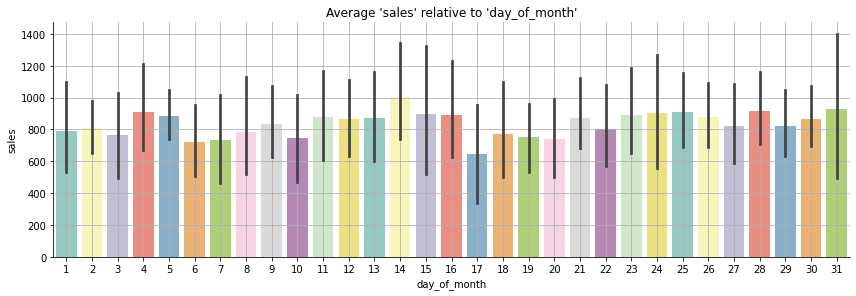

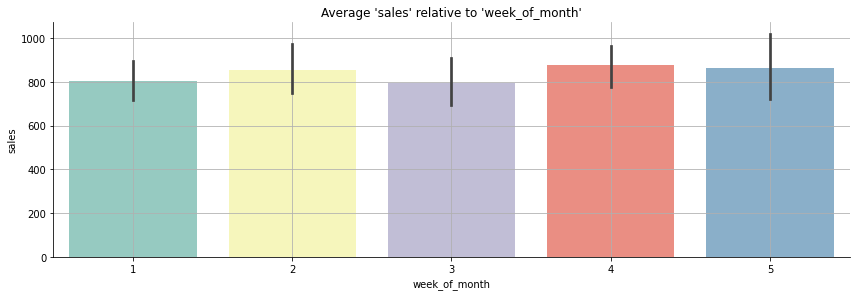

In [144]:
for feature_name in CATEGORICAL_FEATURES:
  sns.catplot(x=feature_name, y=LABEL, kind='bar', dodge=False, height=4, aspect=3, data=df, palette='Set3')
  plt.title(f"Average '{LABEL}' relative to '{feature_name}'")
  plt.grid()
  plt.show()

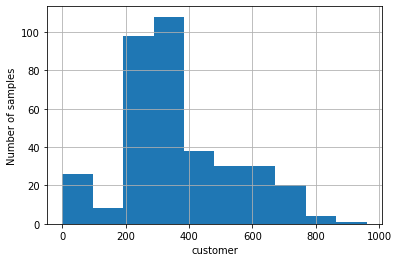

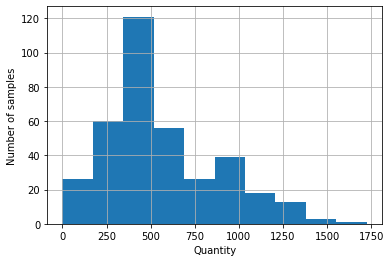

In [145]:
for feature_name in NUMERICAL_FEATURES:
  fig, ax = plt.subplots()
  ax.hist(df[feature_name])
  ax.set_ylabel('Number of samples')
  ax.set_xlabel(feature_name)
  ax.grid()
  plt.show()

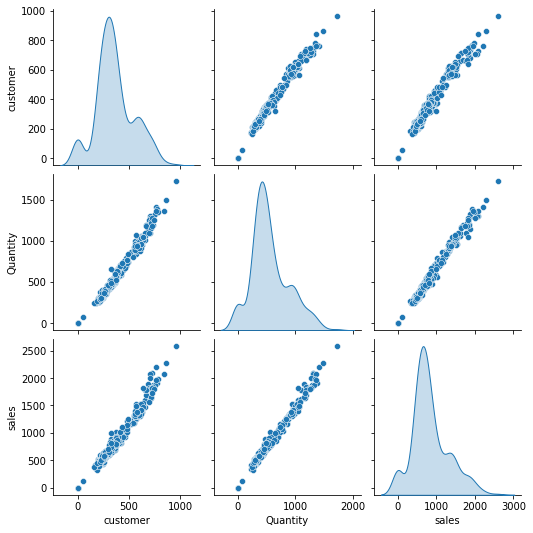

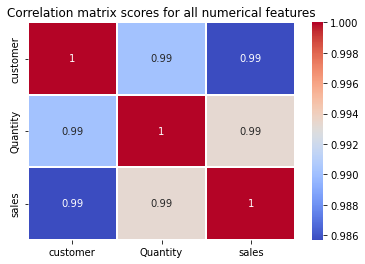

In [146]:
fig = sns.pairplot(df[NUMERICAL_FEATURES + [LABEL]], diag_kind='kde')
plt.show()

corr_matrix = df[NUMERICAL_FEATURES + [LABEL]].corr().round(4)
fig, ax    = plt.subplots()
sns.heatmap(data=corr_matrix, annot=True, linewidths=1, cmap='coolwarm')
plt.title('Correlation matrix scores for all numerical features')
plt.show()

## Data Preprocessing

In [147]:
# Next Day Prediction Model Input

next_day = df.index.max() + timedelta(days=1)
prediction_input_df = pd.DataFrame({
    'day_name': pd.Series(next_day).dt.day_name().values[0],
    'day_of_month': pd.Series(next_day).dt.day.values[0],
    'week_of_month': pd.Series(next_day).apply(lambda x: (x.day - 1) // 7 + 1).values[0],
    'customer': 500,
    'Quantity': 600,
}, index=[df.index.max() + timedelta(days=1)])

prediction_input_df

,day_name,day_of_month,week_of_month,customer,Quantity
2021-12-31,Friday,31,5,500,600


In [148]:
df = pd.concat([df, prediction_input_df])
df

,sales,customer,Quantity,day_name,day_of_month,week_of_month
2021-01-02,987.85,365.0,581.0,Saturday,2,1
2021-01-03,1014.30,375.0,564.0,Sunday,3,1
2021-01-04,461.90,210.0,315.0,Monday,4,1
2021-01-05,515.70,235.0,309.0,Tuesday,5,1
2021-01-06,0.00,0.0,0.0,Wednesday,6,1
...,...,...,...,...,...,...
2021-12-27,751.55,329.0,506.0,Monday,27,4
2021-12-28,792.40,370.0,524.0,Tuesday,28,4
2021-12-29,704.75,294.0,458.0,Wednesday,29,5
2021-12-30,820.85,324.0,492.0,Thursday,30,5


In [149]:
# One Hot Encoding

temp_df = df.copy()

for feature_name in CATEGORICAL_FEATURES:
  temp_df = pd.concat([temp_df, pd.get_dummies(temp_df[feature_name], prefix=feature_name, prefix_sep='_')], axis=1)
  temp_df.drop([feature_name], axis=1, inplace=True)
temp_df.sort_index(axis=0, inplace=True)
temp_df.sort_index(axis=1, inplace=True)
temp_df = temp_df.astype(np.float32)

encoded_df = temp_df[:-1]
prediction_input_df = temp_df[-1:]

In [150]:
encoded_df

,Quantity,customer,day_name_Friday,day_name_Monday,day_name_Saturday,day_name_Sunday,day_name_Thursday,day_name_Tuesday,day_name_Wednesday,day_of_month_1,...,day_of_month_6,day_of_month_7,day_of_month_8,day_of_month_9,sales,week_of_month_1,week_of_month_2,week_of_month_3,week_of_month_4,week_of_month_5
2021-01-02,581.0,365.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,987.849976,1.0,0.0,0.0,0.0,0.0
2021-01-03,564.0,375.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1014.299988,1.0,0.0,0.0,0.0,0.0
2021-01-04,315.0,210.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,461.899994,1.0,0.0,0.0,0.0,0.0
2021-01-05,309.0,235.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,515.700012,1.0,0.0,0.0,0.0,0.0
2021-01-06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.000000,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-26,735.0,429.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1115.000000,0.0,0.0,0.0,1.0,0.0
2021-12-27,506.0,329.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,751.549988,0.0,0.0,0.0,1.0,0.0
2021-12-28,524.0,370.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,792.400024,0.0,0.0,0.0,1.0,0.0
2021-12-29,458.0,294.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,704.750000,0.0,0.0,0.0,0.0,1.0


In [151]:
prediction_input_df

,Quantity,customer,day_name_Friday,day_name_Monday,day_name_Saturday,day_name_Sunday,day_name_Thursday,day_name_Tuesday,day_name_Wednesday,day_of_month_1,...,day_of_month_6,day_of_month_7,day_of_month_8,day_of_month_9,sales,week_of_month_1,week_of_month_2,week_of_month_3,week_of_month_4,week_of_month_5
2021-12-31,600.0,500.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,1.0


In [152]:
# Lag Features

WINDOW_SIZE = 7

temp_df = encoded_df.copy()
windowed_df = pd.DataFrame()

# Create windowed columns
for i in range(WINDOW_SIZE):
  temp_df[f'{LABEL}_{i+1}'] = temp_df[LABEL].shift(periods=i+1) # Shift values for each step in WINDOW
temp_df = temp_df.dropna()
windowed_df  = windowed_df.append(temp_df)
windowed_df.sort_index(axis=1, inplace=True)

windowed_df

,Quantity,customer,day_name_Friday,day_name_Monday,day_name_Saturday,day_name_Sunday,day_name_Thursday,day_name_Tuesday,day_name_Wednesday,day_of_month_1,...,sales_3,sales_4,sales_5,sales_6,sales_7,week_of_month_1,week_of_month_2,week_of_month_3,week_of_month_4,week_of_month_5
2021-01-09,394.0,269.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,515.700012,461.899994,1014.299988,987.849976,0.0,1.0,0.0,0.0,0.0
2021-01-10,473.0,325.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,544.000000,0.000000,515.700012,461.899994,1014.299988,0.0,1.0,0.0,0.0,0.0
2021-01-11,291.0,208.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,533.599976,544.000000,0.000000,515.700012,461.899994,0.0,1.0,0.0,0.0,0.0
2021-01-12,258.0,188.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,666.450012,533.599976,544.000000,0.000000,515.700012,0.0,1.0,0.0,0.0,0.0
2021-01-13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,890.799988,666.450012,533.599976,544.000000,0.000000,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-26,735.0,429.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,770.549988,578.799988,655.500000,603.650024,819.900024,0.0,0.0,0.0,1.0,0.0
2021-12-27,506.0,329.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1824.400024,770.549988,578.799988,655.500000,603.650024,0.0,0.0,0.0,1.0,0.0
2021-12-28,524.0,370.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,992.400024,1824.400024,770.549988,578.799988,655.500000,0.0,0.0,0.0,1.0,0.0
2021-12-29,458.0,294.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1115.000000,992.400024,1824.400024,770.549988,578.799988,0.0,0.0,0.0,0.0,1.0


In [153]:
# Train Test split

TRAIN_SIZE = int(0.8 * len(windowed_df))

X = windowed_df.drop([LABEL], axis=1)
y = windowed_df[LABEL]
X_train = X[:TRAIN_SIZE]
y_train = y[:TRAIN_SIZE]
X_test  = X[TRAIN_SIZE:]
y_test  = y[TRAIN_SIZE:]

(len(X_train), len(y_train), len(X_test), len(y_test))

(284, 284, 72, 72)

## Modeling

In [154]:
model = tf.keras.Sequential([
      tf.keras.layers.Input([X_train.shape[1]]),
      tf.keras.layers.Lambda(lambda i: tf.expand_dims(i, axis=1)),
      tf.keras.layers.LSTM(128),
      tf.keras.layers.Dense(128),
      tf.keras.layers.Dense(64),
      tf.keras.layers.Dense(1)
    ])

model.compile(loss='mae', optimizer='adam')

model.fit(X_train, y_train, epochs=100)

Epoch 1/100
9/9 [==============================] - 2s 6ms/step - loss: 887.7131
Epoch 2/100
9/9 [==============================] - 0s 6ms/step - loss: 879.5061
Epoch 3/100
9/9 [==============================] - 0s 6ms/step - loss: 861.9634
Epoch 4/100
9/9 [==============================] - 0s 5ms/step - loss: 827.0966
Epoch 5/100
9/9 [==============================] - 0s 6ms/step - loss: 767.6483
Epoch 6/100
9/9 [==============================] - 0s 13ms/step - loss: 673.5247
Epoch 7/100
9/9 [==============================] - 0s 7ms/step - loss: 531.9775
Epoch 8/100
9/9 [==============================] - 0s 8ms/step - loss: 383.0360
Epoch 9/100
9/9 [==============================] - 0s 7ms/step - loss: 326.7253
Epoch 10/100
9/9 [==============================] - 0s 6ms/step - loss: 309.8030
Epoch 11/100
9/9 [==============================] - 0s 6ms/step - loss: 305.3457
Epoch 12/100
9/9 [==============================] - 0s 7ms/step - loss: 300.3037
Epoch 13/100
9/9 [==================

In [155]:
# Evaluation

prediction = np.squeeze(model.predict(X_test.to_numpy()))
evaluation_df = X_test.copy()
evaluation_df.insert(0, 'Actual', y_test.to_numpy())
evaluation_df.insert(1, 'Prediction', prediction)

WAPE = (evaluation_df['Actual'] - evaluation_df['Prediction']).abs().sum() / evaluation_df['Actual'].sum()
print('WAPE: ', WAPE)
evaluation_df

3/3 [==============================] - 0s 4ms/step
WAPE:  0.40409896


,Actual,Prediction,Quantity,customer,day_name_Friday,day_name_Monday,day_name_Saturday,day_name_Sunday,day_name_Thursday,day_name_Tuesday,...,sales_3,sales_4,sales_5,sales_6,sales_7,week_of_month_1,week_of_month_2,week_of_month_3,week_of_month_4,week_of_month_5
2021-10-20,525.900024,790.258118,315.0,234.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1008.799988,709.299988,484.299988,516.700012,469.700012,0.0,0.0,1.0,0.0,0.0
2021-10-21,618.750000,999.253174,378.0,262.0,0.0,0.0,0.0,0.0,1.0,0.0,...,415.100006,1008.799988,709.299988,484.299988,516.700012,0.0,0.0,1.0,0.0,0.0
2021-10-22,622.750000,929.820007,379.0,264.0,1.0,0.0,0.0,0.0,0.0,0.0,...,566.200012,415.100006,1008.799988,709.299988,484.299988,0.0,0.0,0.0,1.0,0.0
2021-10-23,849.700012,1229.352417,616.0,396.0,0.0,0.0,1.0,0.0,0.0,0.0,...,525.900024,566.200012,415.100006,1008.799988,709.299988,0.0,0.0,0.0,1.0,0.0
2021-10-24,1245.949951,1333.210083,835.0,496.0,0.0,0.0,0.0,1.0,0.0,0.0,...,618.750000,525.900024,566.200012,415.100006,1008.799988,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-26,1115.000000,1122.906860,735.0,429.0,0.0,0.0,0.0,1.0,0.0,0.0,...,770.549988,578.799988,655.500000,603.650024,819.900024,0.0,0.0,0.0,1.0,0.0
2021-12-27,751.549988,920.753967,506.0,329.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1824.400024,770.549988,578.799988,655.500000,603.650024,0.0,0.0,0.0,1.0,0.0
2021-12-28,792.400024,819.955566,524.0,370.0,0.0,0.0,0.0,0.0,0.0,1.0,...,992.400024,1824.400024,770.549988,578.799988,655.500000,0.0,0.0,0.0,1.0,0.0
2021-12-29,704.750000,786.900208,458.0,294.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1115.000000,992.400024,1824.400024,770.549988,578.799988,0.0,0.0,0.0,0.0,1.0


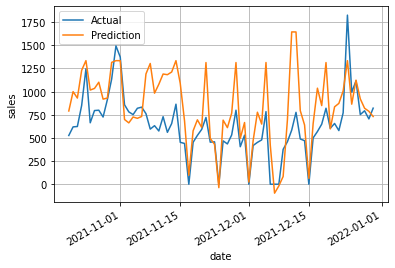

In [164]:
plt.plot(evaluation_df['Actual'])
plt.plot(evaluation_df['Prediction'])
plt.ylabel(LABEL)
plt.xlabel('date')
plt.legend(['Actual', 'Prediction'])
plt.grid()
plt.gcf().autofmt_xdate()
plt.show()

In [167]:
# For Predicting Next Day

columns = [LABEL] + [col for col in windowed_df.columns if col.startswith(f'{LABEL}_')]
columns.sort()

X_lag = windowed_df[columns][-1:].copy()
temp_X_lag = windowed_df[columns][-1:].copy()

for col, i in zip(columns, range(-1, len(columns)-1)):
  X_lag[col] = temp_X_lag[columns[i % len(columns)]]
X_lag.drop([LABEL], axis=1, inplace=True)

X_input = prediction_input_df.copy()
for col in X_lag.columns:
  X_input[col] = X_lag[col].to_numpy()
X_input.sort_index(axis=1, inplace=True)
X_input.drop([LABEL], axis=1, inplace=True)

X_input

,Quantity,customer,day_name_Friday,day_name_Monday,day_name_Saturday,day_name_Sunday,day_name_Thursday,day_name_Tuesday,day_name_Wednesday,day_of_month_1,...,sales_3,sales_4,sales_5,sales_6,sales_7,week_of_month_1,week_of_month_2,week_of_month_3,week_of_month_4,week_of_month_5
2021-12-31,600.0,500.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,792.400024,751.549988,1115.0,992.400024,1824.400024,0.0,0.0,0.0,0.0,1.0


1/1 [==============================] - 0s 20ms/step


<ipython-input-177-516ee57a94ad>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result_df[LABEL][-1:] = prediction


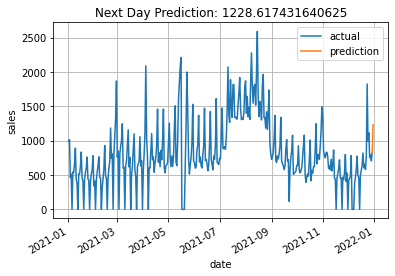

In [177]:
prediction = np.squeeze(model.predict(X_input.to_numpy()))

result_df = df.copy()
result_df[LABEL][-1:] = prediction

plt.title(f'Next Day Prediction: {prediction}')
plt.plot(result_df[LABEL][:-1])
plt.plot(result_df[LABEL][-2:])
plt.ylabel(LABEL)
plt.xlabel('date')
plt.legend(['actual', 'prediction'])
plt.grid()
plt.gcf().autofmt_xdate()
plt.show()